# Assignment 2. Statistical Methods in Data Science

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For your questions refer to asoleix@gmail.com or @amirsoleix on Telegram*

### Description  
In this homework you will again work with real-world data. <a href="https://en.wikipedia.org/wiki/Upworthy"> **Upworthy**</a> is a news website dedicated to creating viral and positive content. During the lectures, you have seen (or soon will see) how maximizing user engagement and click-rate is of great importance and a main objective for such businesses.  

### Information  
Complete the information box below.

In [82]:
full_name = 'Mohammadhadi Hadavi'
student_id = '99100263'

In [83]:
#Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os.path
import gzip
import math

Using the data from <a href="https://doi.org/10.1038/s41597-021-00934-7">this paper</a> (provided in `data` folder), you are supposed to:
- Use more advanced practices in Numpy, Pandas, Matplotlib frequently used in data science projects
- Perform simple statistical analysis on real-world data
- Go one step further and generalize your findings
- Suggest insightful directions for improving the website's performance  



### Notes  
In the sections marked with **Discuss**, no coding is required. Just present your whole logic and the steps you took thinking and coming up with the result. You can provide your explanation either in **English** or **Persian**. There is no obligation to use any specific language.

### Understanding the Problem
As stated above, Upworthy is, in essence, a content creation and news delivery business. The process of creating a news-related post starts from the raw material and then proceeds to processing the information and presenting it in a way that engages the users, i.e. having them interact with the website, as much as possible.  

We have discussed main objectives and income sources of various businesses and how data science can affect that. You must know that the main source of revenue and consequently the most important goal of Upworthy, is to get the most views and clicks per piece of news.  

A typical form of presentation for news websites is to first show the user a headline together with a thumbnail and sometimes an excerpt (or **lede** as defined later). But it is a well-known fact that not all the headlines attract users the same.  

There are always several possible headlines that can be used for a piece of news. Nonetheless, just one can be used for presenting each content and we know that there is no scientific or formulaic approach to predict which one will actually be the most interesting for the users.  

**Here is where you data scientists are brought into field!**  
The problem is simply to find which headline should be chosen for any individual post to maximize the website's profit. What solutions come to your mind? Can you think of a novel formula to mathematically calculate an indicator of the headlines attractiveness? What about its engaging rate?


### Discuss
What possible solutions can you think of for this problem? Can you solve it mathematically? If so explain your solution, and if not, explain why do you think it's not feasible?

To solve this problem Mathematically, first you need to have an assumption on the distribution which your data comes from.

Then, if you assume that your data is from a specific Probability Distribution, then for each of the scenarios, how well this datas fit into your distribution;
In other words, for each of the scenarios, we should calculate the probability which we can have this datas from the assumed distribution. If that probability is meaningful, e.g. not very low(by some treshold which is related to our problem), it means that your assumption on the distribution is correct and this scenario fits this distribution very well.

After this, when you have chosed the right scenario, then you can solve it regarding to that answer and get the best result you are looking for.

### Continuing with data science...

As you have learnt during the past lectures, the first step to understand the problem, as carried out by the scientists hired by Upworthy, is to collect as much data as available. Then they have performed simple statistical analysis to understand wether one headline is significantly impacting the users' interaction with the website.

Throughout this homework, we will analyze data from A/B tests of headlines conducted by Upworthy from January 2013 to April 2015 to study whether the language used in the headline determines the number of people that will read the associated news piece.  
The homework contains four tasks:  
1. Processing the data  
2. Extracting meaningful signals from the data
3. Testing whether the language of headlines impacts their success  
4. Exploring the heterogeneity of this effects (e.g., does it vary through time?).


### **What is an A/B test?** 
A/B tests are experiments that compare two scenarios (e.g., scenario A vs. scenario B). 
They test subjects' responses to each of the variants to determine which is more effective ([read more about A/B tests on Wikipedia](https://en.wikipedia.org/wiki/A/B_testing)).  
A/B tests allow us to draw conclusions about the different scenarios by randomizing exposure to them, e.g., one could flip a coin and assign a user to scenario A if it lands heads and to B if it lands tails.  
Since exposure is randomized, we can be confident that the scenarios are the sole explanation for statistically significant differences in subjects' responses (if they exist).  
In theory, A/B testing refers to an experiment that compares two scenarios; however, in practice, the term is also used when we compare multiple scenarios (e.g., A vs. B vs. C), although the more precise terminology would be to call such an experiment a "multinomial test."

### **How were A/B tests used by Upworthy?** 
Upworthy used A/B testing to increase news readership, conducting experiments for each published news piece.  
In each experiment, they created multiple "packages" of stimuli, varying headlines, images, excerpts, and **ledes** for the same news piece.  
Different "packages" were shown on their (now defunct) website to engage users with the news pieces they produced. Upworthy found "the best" package by conducting A/B tests, showing different packages to different users, and measuring how often users clicked on each version.  
Below, we show three "packages" used by Upworthy in an experiment, each with a different headline for the same news piece.  
Upworthy randomized users that visited their website saw one of the three versions of the headline below. Then, they measured the percentage of times users in each scenario clicked to read the news.  
The headline with the highest percentage of clicks per view (click through rate) was then declared the "winner" and became the default for all visitors.

![Example A/B test](example.png)

### **Terminology**

- **News piece:** A news article. In the dataset considered, these were all produced by Upworthy.
- **Package:** The set of visual stimuli inviting the user to read an article. The figure above shows a package with a headline and an image. At times, there was an excerpt of the article also shown in the package and/or the **lede**, i.e., ["the introductory section of a news story that is intended to entice the reader to read the full story."](https://www.merriam-webster.com/words-at-play/bury-the-lede-versus-lead#:~:text=In%20journalism%2C%20the%20lede%20refers,machines%20began%20disappearing%20from%20newsrooms.)
- **Experiment:** Each experiment is an A/B test (or multinomial test, to be more precise) comparing how users reacted to different "packages." Experiments measured two things: 
  1. how many users were shown each package.
  2. how many individuals clicked each package.


### **Data description**

| Column name          | Description                                                                                                                                    
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| created_at           | Time the package was created (timezone unknown)|
| test_week            | Week the package was created, a variable constructed by the archive creators for stratified random sampling|
| clickability_test_id | The test ID. Viewers were randomly assigned to packages with the same test ID|
| impressions          | The number of viewers who were assigned to this package. The total number of participants for a given test is the sum of impressions for all packages that share the same clickability_test_id|
| headline             | The headline being tested|
| eyecatcher_id        | Image ID. Image files are not available. Packages that shared the same image have the same eyecatcher_id|
| clicks               | The number of viewers (impressions) that clicked on the package. The clickrate for a given package is the number of clicks divided by the number of impressions|
| excerpt              | Article excerpt|
| lede                 | The opening sentence or paragraph of the story|
| slug                 | Internal name for the web address|
| share_text           | Summary for display on social media when the article is shared. This was not shown in tests, since tests were conducted on the Upworthy website|
| square               | When used, part of the same social media sharing suggestion as the share text|
| significance         | NOT an estimate of statistical significance; a complex, inconsistent calculation that compared the clicks on a package to the clicks on all previous packages that were fielded on the same pages|
| first_place          | Along with significance, shown to editors to guide decisions about what test to choose|
| winner               | Whether a package was selected by editors to be used on the Upworthy site after the test|
| updated_at           | The last time the package was updated in the Upworthy system|


## 1 Getting Familiar with the Data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

In [84]:
# Loading dataset

# File name
upworthy_filename = "./data/upworthy.csv.gz"

# Loading gzipfile and making DataFrames
upworthy = pd.read_csv(upworthy_filename, compression='gzip')

# Printing first 10 lines
upworthy.head(10)

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
5,2014-11-20 06:55:43.497,2016-04-02 16:25:54.034,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900484ad38b2ce000027,3431,86,3.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
6,2014-11-20 06:55:57.651,2016-04-02 16:25:54.039,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900484ad385a0a000038,3394,76,0.5,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
7,2014-11-20 06:56:08.696,2016-04-02 16:25:54.043,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900484ad381bbe00002b,3505,95,11.6,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
8,2014-11-20 06:56:21.343,2016-04-02 16:31:48.08,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002f,3423,84,1.9,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
9,2014-11-20 13:23:11.221,2016-04-02 16:31:45.612,546deb3f26714cd2dd00003a,Things that matter. Pass 'em on.,Kim Jong Un Would Really Hate For You To Watch...,"<p>At age 21, Yeonmi Park is a brand new activ...",kim-jong-un-would-really-hate-for-you-to-watch...,545c477e74bfe7589400000b,3910,142,38.6,False,False,NaN,NaN,201446


1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment.  
Last, plot the distribution of packages per experiment with a visualization of your choice.

Number of different experiments is : 4822
Average number of package per experiment is : 4.2727084197428455


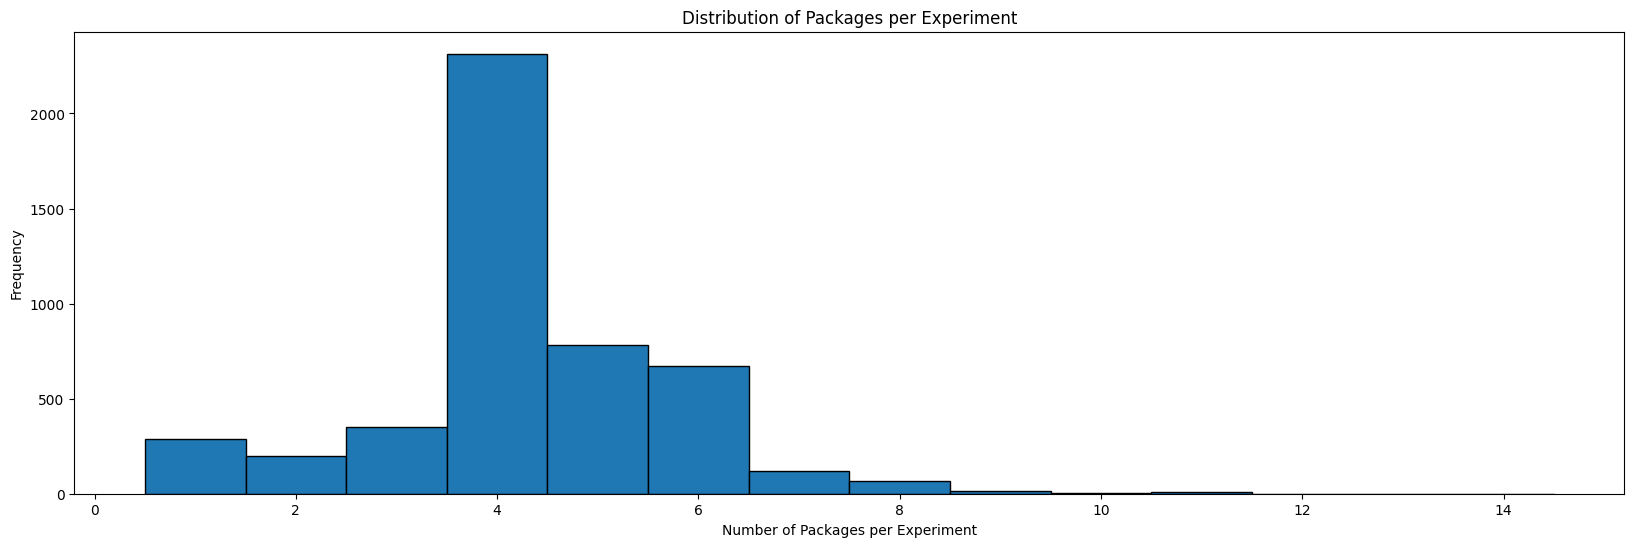

In [85]:
# Number of different experiments being conducted
print("Number of different experiments is : " + str(len(upworthy['clickability_test_id'].unique())))

# Average number of packages per experiment
print("Average number of package per experiment is : " + str((len(upworthy['clickability_test_id'])) / (len(upworthy['clickability_test_id'].unique()))))

# Count the number of occurrences of each unique value in the "clickability_test_id" column
package_counts = upworthy['clickability_test_id'].value_counts()

# Plotting a histogram representing distribution of packages per experiment
plt.figure(figsize=(20, 6))
plt.hist(package_counts, bins=range(1, package_counts.max() + 2), edgecolor='black', align='left')

# Set labels and title
plt.xlabel('Number of Packages per Experiment')
plt.ylabel('Frequency')
plt.title('Distribution of Packages per Experiment')

# Display the plot
plt.show()

1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often.  
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

In [86]:
# Create a new column 'ctr' by dividing 'clicks' by 'impressions'
# If 'impressions' is zero, set 'ctr' to zero; otherwise, perform the division
upworthy['ctr'] = upworthy['clicks'] / upworthy['impressions'].where(upworthy['impressions'] != 0, 0)

print(upworthy['ctr'].head())

0    0.049148
1    0.025525
2    0.034227
3    0.028994
4    0.021645
Name: ctr, dtype: float64


1.4 Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image).  
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present.  
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [87]:
# Count the unique values of 'headline' for each 'clickability_test_id'
headline_counts = upworthy.groupby('clickability_test_id')['headline'].nunique()

# Filter the 'clickability_test_id' based on having only one unique 'headline'
single_headline_experiments = headline_counts[headline_counts == 1].index

# Create a new DataFrame containing only rows with 'clickability_test_id' in single_headline_experiments
filtered_upworthy = upworthy[upworthy['clickability_test_id'].isin(single_headline_experiments)]

print("Length of this new dataframe is " + str(len(filtered_upworthy)) + " and overall " + str(len(upworthy['clickability_test_id'].unique()) - len(filtered_upworthy["clickability_test_id"].unique())) + " Experiments are discarded.")

Length of this new dataframe is 9003 and overall 2586 Experiments are discarded.


1.5 For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image. Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.


In [88]:
# Count the unique values of 'headline' for each 'clickability_test_id'
eyecatcher_id_counts = upworthy.groupby('clickability_test_id')['eyecatcher_id'].nunique()

# Filter the 'clickability_test_id' based on having only one unique 'headline'
single_eyecatcher_id_experiments = eyecatcher_id_counts[eyecatcher_id_counts == 1].index

# Create a new DataFrame containing only rows with 'clickability_test_id' in single_headline_experiments
filtered_upworthy = upworthy[upworthy['clickability_test_id'].isin(single_eyecatcher_id_experiments)]

print("Length of this new dataframe is " + str(len(filtered_upworthy)) + " and overall " + str(len(upworthy['clickability_test_id'].unique()) - len(filtered_upworthy["clickability_test_id"].unique())) + " Experiments are discarded.")

Length of this new dataframe is 12655 and overall 1719 Experiments are discarded.


1.6 Considering the answers to questions **T1.4** and **T1.5**, what can we say about the different versions of the news tested by Upworthy?

From the answers to this two questions, it is obvious that when you filter only by the experiments which the image hasn't varied through them, much less data is filtered rather than when you do the filtering only with respect to the healine.

This means that in the experiments, more tests are created with different headlines rather than different images and the effect of using different headlines is more investigated than different images.

1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- Each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- There are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- The columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first rows of your newly created dataframe, as well as its length.
-  The rows where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  The column `date_created` contains the date when the news version with the highest clickthrough rate was created.


In [89]:
# Create a new DataFrame for the desired output
temp_upworthy = {'clickability_test_id': [], 'eyecatcher_id': [], 'lede': [], 'excerpt': [], 'headline1': [],
                 'headline2': [], 'ctr1': [], 'ctr2': [], 'date_created': []}

# Group the DataFrame by 'clickability_test_id', 'eyecatcher_id', 'lede', and 'excerpt'
for _, group in upworthy.groupby(['clickability_test_id', 'eyecatcher_id', 'lede', 'excerpt']):
    # Check if there are at least two rows in the group
    if len(group) >= 2:
        # Generate all possible pairs of indices within the group
        pairs = [(i, j) for i in range(len(group)) for j in range(i + 1, len(group))]
        # Iterate over each pair of indices
        for pair in pairs:
            index1, index2 = pair
            row1, row2 = group.iloc[index1], group.iloc[index2]
            # Check if the headlines are different
            if row1['headline'] != row2['headline']:
                # Append values to the temp_upworthy dictionary
                temp_upworthy['clickability_test_id'].append(row1['clickability_test_id'])
                temp_upworthy['eyecatcher_id'].append(row1['eyecatcher_id'])
                temp_upworthy['lede'].append(row1['lede'])
                temp_upworthy['excerpt'].append(row1['excerpt'])
                temp_upworthy['headline1'].append(row1['headline'] if row1['ctr'] > row2['ctr'] else row2['headline'])
                temp_upworthy['headline2'].append(row2['headline'] if row1['ctr'] > row2['ctr'] else row1['headline'])
                temp_upworthy['ctr1'].append(row1['ctr'] if row1['ctr'] > row2['ctr'] else row2['ctr'])
                temp_upworthy['ctr2'].append(row2['ctr'] if row1['ctr'] > row2['ctr'] else row1['ctr'])
                temp_upworthy['date_created'].append(
                    pd.to_datetime(row1['created_at'] if row1['ctr'] > row2['ctr'] else row2['created_at']))

# Create a DataFrame from the temp_upworthy dictionary
new_upworthy = pd.DataFrame(temp_upworthy)

# Filter out rows where the two news pieces had exactly the same clickthrough rate
new_upworthy = new_upworthy[new_upworthy['ctr1'] != new_upworthy['ctr2']]

print("Length of this new dataframe is " + str(len(new_upworthy['ctr1'])))
new_upworthy.head()

Length of this new dataframe is 15670


,clickability_test_id,eyecatcher_id,lede,excerpt,headline1,headline2,ctr1,ctr2,date_created
0,51436069220cb800020005bd,5332ba141fae79f09f002c47,"<p>The President made a lot of promises, and h...",You have so much potential. Why are you wastin...,"Mr. President, I'm Not Mad. I'm Just Disappoin...","Mr. President, I'm Not Mad. I'm Just Disappoin...",0.019770,0.016595,2013-02-07 05:42:25
1,5143606a220cb800020005c6,5332ba211fae79f09f002dcf,<p>If you think Fawzia Koofi is crazy for want...,You don't want to miss this incredible story.,MAD RESPECT: This Brave Woman Is Running For P...,This Brave Woman Is Running For President Of A...,0.011216,0.009410,2013-02-19 19:05:45
2,5143606a220cb800020005c6,5332ba211fae79f09f002dcf,<p>If you think Fawzia Koofi is crazy for want...,You don't want to miss this incredible story.,"If You Think Hillary Had A Rough Campaign, You...",MAD RESPECT: This Brave Woman Is Running For P...,0.012807,0.011216,2013-02-19 19:03:39
3,5143606a220cb800020005c6,5332ba211fae79f09f002dcf,<p>If you think Fawzia Koofi is crazy for want...,You don't want to miss this incredible story.,"If You Think Hillary Had A Rough Campaign, You...",This Brave Woman Is Running For President Of A...,0.012807,0.009410,2013-02-19 19:03:39
4,5143606b220cb800020005d7,5332ba581fae79f09f003326,<p><p>Sean Hannity thinks all women should hav...,Science can be confusing if you don't believe ...,Sean Hannity Thinks Telling Men Not To Attack ...,Sean Hannity Thinks Its Waaaaay Too Hard To Te...,0.013675,0.013050,2013-03-09 06:55:39


1.8 To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`).

In [90]:
# Lists to store the differences and lowest CTR values
differences = []
lowest_ctr_values = []

# Group the DataFrame by 'clickability_test_id', 'eyecatcher_id', 'lede', and 'excerpt'
for _, group in upworthy.groupby(['clickability_test_id', 'eyecatcher_id', 'lede', 'excerpt']):
    # Check if there are at least two rows in the group
    if len(group) >= 2:
        # Find the row with the lowest CTR in the group
        lowest_ctr_row = group.loc[group['ctr'].idxmin()]

        # Append the lowest CTR value among all pairs
        lowest_ctr_values.append(lowest_ctr_row['ctr'])

        # Generate all possible pairs of indices within the group
        pairs = [(i, j) for i in range(len(group)) for j in range(i + 1, len(group))]
        
        # Iterate over each pair of indices
        for pair in pairs:
            index1, index2 = pair
            row1, row2 = group.iloc[index1], group.iloc[index2]
            
            # Check if the headlines and CTR values are different
            if (row1['headline'] != row2['headline']) and (row1['ctr'] != row2['ctr']):
                # Calculate the difference between the highest and lowest CTR
                differences.append(abs(row1['ctr'] - row2['ctr']))

# Calculate the average difference between the highest and lowest CTR
average_difference = sum(differences) / len(differences)
print("Average difference per pair ctr is : " + str(average_difference))

# Calculate the average CTR for the packages with the lowest CTR
average_lowest_ctr = sum(lowest_ctr_values) / len(lowest_ctr_values)
print("Average lowest ctr among different experiments is : " + str(average_lowest_ctr))

# Rate of average difference between the lower and higher ctr, to the average of lowest ctr's
print("Rate of average difference between the lower and higher ctr, to the average of lowest ctr's is : " + str(average_difference / average_lowest_ctr))

Average difference per pair ctr is : 0.004131570860971893
Average lowest ctr among different experiments is : 0.011063773977826069
Rate of average difference between the lower and higher ctr, to the average of lowest ctr's is : 0.3734323269123498


 1.9 **Discuss:** Considering your answer to **T1.8**, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

As we can see from the last section, by average, there is a 37% increase rather to the package which has the lowest clicktrough rate, for the package with higher clicktrough rate. This is a considerable amount which implies that the role of different headlines is really significant and important in clicktrough rate.

## 2 Extracting Signals from the Data

Your second task is to extract meaningful signals from the data.  
We start this task from the dataset obtained in **T1.7**.   
Recall that we have one A/B test per row with the clickthrough rate of two news pieces that differ only in their headline.  
We refer to the version with the higher clickthrough rate as the "winner" and the version with the lower as the "loser."  
(Note that this is not the same as the column `winner` in the original data, which captures a similar concept but considering the original experiments, where multiple comparisons were made!)  
 
2.1 Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

In [91]:
# 2.1 (provided code)
def count_words_simple(x):
    return len(x.split(" "))
str_test = "How many words are here?"
print(str_test, count_words_simple(str_test))

How many words are here? 5


In [92]:
# Apply the function to 'headline1' and 'headline2' columns to make new two coloumns
new_upworthy['numwords1'] = new_upworthy['headline1'].apply(count_words_simple)
new_upworthy['numwords2'] = new_upworthy['headline2'].apply(count_words_simple)

new_upworthy.head()

,clickability_test_id,eyecatcher_id,lede,excerpt,headline1,headline2,ctr1,ctr2,date_created,numwords1,numwords2
0,51436069220cb800020005bd,5332ba141fae79f09f002c47,"<p>The President made a lot of promises, and h...",You have so much potential. Why are you wastin...,"Mr. President, I'm Not Mad. I'm Just Disappoin...","Mr. President, I'm Not Mad. I'm Just Disappoin...",0.019770,0.016595,2013-02-07 05:42:25,9,15
1,5143606a220cb800020005c6,5332ba211fae79f09f002dcf,<p>If you think Fawzia Koofi is crazy for want...,You don't want to miss this incredible story.,MAD RESPECT: This Brave Woman Is Running For P...,This Brave Woman Is Running For President Of A...,0.011216,0.009410,2013-02-19 19:05:45,17,11
2,5143606a220cb800020005c6,5332ba211fae79f09f002dcf,<p>If you think Fawzia Koofi is crazy for want...,You don't want to miss this incredible story.,"If You Think Hillary Had A Rough Campaign, You...",MAD RESPECT: This Brave Woman Is Running For P...,0.012807,0.011216,2013-02-19 19:03:39,15,17
3,5143606a220cb800020005c6,5332ba211fae79f09f002dcf,<p>If you think Fawzia Koofi is crazy for want...,You don't want to miss this incredible story.,"If You Think Hillary Had A Rough Campaign, You...",This Brave Woman Is Running For President Of A...,0.012807,0.009410,2013-02-19 19:03:39,15,11
4,5143606b220cb800020005d7,5332ba581fae79f09f003326,<p><p>Sean Hannity thinks all women should hav...,Science can be confusing if you don't believe ...,Sean Hannity Thinks Telling Men Not To Attack ...,Sean Hannity Thinks Its Waaaaay Too Hard To Te...,0.013675,0.013050,2013-03-09 06:55:39,11,14


2.2 Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test). 
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise. 
Your code should be agnostic to lower/upper case.

In [93]:
# 2.2 (provided code)
feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])

In [94]:
# Iterate over each key in the feature_wordsets dictionary
for key in feature_wordsets.keys():
    # Create new columns for each key in 2 versions: keyname1 and keyname2
    new_upworthy[key + '1'] = new_upworthy['headline1'].apply(lambda x: 1 if any(word in x for word in feature_wordsets[key]) else 0)
    new_upworthy[key + '2'] = new_upworthy['headline2'].apply(lambda x: 1 if any(word in x for word in feature_wordsets[key]) else 0)

new_upworthy.head()

,clickability_test_id,eyecatcher_id,lede,excerpt,headline1,headline2,ctr1,ctr2,date_created,numwords1,...,first_person_singular1,first_person_singular2,first_person_plural1,first_person_plural2,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2
0,51436069220cb800020005bd,5332ba141fae79f09f002c47,"<p>The President made a lot of promises, and h...",You have so much potential. Why are you wastin...,"Mr. President, I'm Not Mad. I'm Just Disappoin...","Mr. President, I'm Not Mad. I'm Just Disappoin...",0.019770,0.016595,2013-02-07 05:42:25,9,...,1,1,1,1,0,0,0,1,0,0
1,5143606a220cb800020005c6,5332ba211fae79f09f002dcf,<p>If you think Fawzia Koofi is crazy for want...,You don't want to miss this incredible story.,MAD RESPECT: This Brave Woman Is Running For P...,This Brave Woman Is Running For President Of A...,0.011216,0.009410,2013-02-19 19:05:45,17,...,1,1,0,0,0,0,1,1,0,0
2,5143606a220cb800020005c6,5332ba211fae79f09f002dcf,<p>If you think Fawzia Koofi is crazy for want...,You don't want to miss this incredible story.,"If You Think Hillary Had A Rough Campaign, You...",MAD RESPECT: This Brave Woman Is Running For P...,0.012807,0.011216,2013-02-19 19:03:39,15,...,1,1,0,0,0,0,0,1,0,0
3,5143606a220cb800020005c6,5332ba211fae79f09f002dcf,<p>If you think Fawzia Koofi is crazy for want...,You don't want to miss this incredible story.,"If You Think Hillary Had A Rough Campaign, You...",This Brave Woman Is Running For President Of A...,0.012807,0.009410,2013-02-19 19:03:39,15,...,1,1,0,0,0,0,0,1,0,0
4,5143606b220cb800020005d7,5332ba581fae79f09f003326,<p><p>Sean Hannity thinks all women should hav...,Science can be confusing if you don't believe ...,Sean Hannity Thinks Telling Men Not To Attack ...,Sean Hannity Thinks Its Waaaaay Too Hard To Te...,0.013675,0.013050,2013-03-09 06:55:39,11,...,1,1,0,0,0,0,1,1,0,0


2.3 One easy way to classify sentiment is simply to match negative or positive words. 
    Use the lists of words (positive and negative files in `data` folder) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.
    
[1]: https://ptrckprry.com/course/ssd/data/positive-words.txt
[2]: https://ptrckprry.com/course/ssd/data/negative-words.txt

--- 

**Comments**

- For **T2.3**, beware of encodings!

In [95]:
# File paths
positive_file_path = './data/positive-words.txt'
negative_file_path = './data/negative-words.txt'

# Function to read words from a file, skipping description part
def read_words(file_path):
    with open(file_path, 'r', encoding='latin-1') as file:
        # Read lines starting from line 36 until one line before the last line
        lines = file.readlines()[35:-1]
        # Extract words and remove leading/trailing whitespaces
        words = [line.strip() for line in lines]
    return np.array(words)

# Read positive and negative words
positive = read_words(positive_file_path)
negative = read_words(negative_file_path)

# Print the first few words in each array for verification
print("Positive Words:", positive[:5])
print("Negative Words:", negative[:5])

Positive Words: ['a+' 'abound' 'abounds' 'abundance' 'abundant']
Negative Words: ['2-faced' '2-faces' 'abnormal' 'abolish' 'abominable']


In [96]:
# Function to check if a headline contains at least one positive sentiment word
def has_positive_sentiment(headline, positive_words):
    # Check if any words in the positive word list exist in the headline
    for positive_word in positive_words:
        if positive_word in headline:
            return 1  # Positive word found, return 1 immediately
    return 0  # No positive word found

# Function to check if a headline contains at least one negative sentiment word
def has_negative_sentiment(headline, negative_words):
    # Check if any words in the negative word list exist in the headline
    for negative_word in negative_words:
        if negative_word in headline:
            return 1  # Negative word found, return 1 immediately
    return 0  # No negative word found

# Add columns 'positive1', 'positive2', 'negative1', 'negative2' to the DataFrame
new_upworthy['positive1'] = new_upworthy['headline1'].apply(lambda x: has_positive_sentiment(x, positive))
new_upworthy['positive2'] = new_upworthy['headline2'].apply(lambda x: has_positive_sentiment(x, positive))
new_upworthy['negative1'] = new_upworthy['headline1'].apply(lambda x: has_negative_sentiment(x, negative))
new_upworthy['negative2'] = new_upworthy['headline2'].apply(lambda x: has_negative_sentiment(x, negative))

new_upworthy.head(5)

,clickability_test_id,eyecatcher_id,lede,excerpt,headline1,headline2,ctr1,ctr2,date_created,numwords1,...,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2,positive1,positive2,negative1,negative2
0,51436069220cb800020005bd,5332ba141fae79f09f002c47,"<p>The President made a lot of promises, and h...",You have so much potential. Why are you wastin...,"Mr. President, I'm Not Mad. I'm Just Disappoin...","Mr. President, I'm Not Mad. I'm Just Disappoin...",0.019770,0.016595,2013-02-07 05:42:25,9,...,0,0,0,1,0,0,0,0,1,1
1,5143606a220cb800020005c6,5332ba211fae79f09f002dcf,<p>If you think Fawzia Koofi is crazy for want...,You don't want to miss this incredible story.,MAD RESPECT: This Brave Woman Is Running For P...,This Brave Woman Is Running For President Of A...,0.011216,0.009410,2013-02-19 19:05:45,17,...,0,0,1,1,0,0,0,0,1,1
2,5143606a220cb800020005c6,5332ba211fae79f09f002dcf,<p>If you think Fawzia Koofi is crazy for want...,You don't want to miss this incredible story.,"If You Think Hillary Had A Rough Campaign, You...",MAD RESPECT: This Brave Woman Is Running For P...,0.012807,0.011216,2013-02-19 19:03:39,15,...,0,0,0,1,0,0,0,0,1,1
3,5143606a220cb800020005c6,5332ba211fae79f09f002dcf,<p>If you think Fawzia Koofi is crazy for want...,You don't want to miss this incredible story.,"If You Think Hillary Had A Rough Campaign, You...",This Brave Woman Is Running For President Of A...,0.012807,0.009410,2013-02-19 19:03:39,15,...,0,0,0,1,0,0,0,0,1,1
4,5143606b220cb800020005d7,5332ba581fae79f09f003326,<p><p>Sean Hannity thinks all women should hav...,Science can be confusing if you don't believe ...,Sean Hannity Thinks Telling Men Not To Attack ...,Sean Hannity Thinks Its Waaaaay Too Hard To Te...,0.013675,0.013050,2013-03-09 06:55:39,11,...,0,0,1,1,0,0,0,0,0,0


## 3 Estimating the Effect of Language on Headline Success

Your third task revolves around the question *how does language impact headlines' success?*

3.1 First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

In [97]:
#Importing scipy.stats to calculate the statistics asked for in the question
from scipy import stats

# Conduct independent sample t-test (assuming equal variance)
independent_ttest_result = stats.ttest_ind(new_upworthy['numwords1'], new_upworthy['numwords2'], equal_var=True)

# Conduct paired t-test
paired_ttest_result = stats.ttest_rel(new_upworthy['numwords1'], new_upworthy['numwords2'])

# Calculate the differences between the number of words in winner and loser headlines
word_differences = new_upworthy['numwords1'] - new_upworthy['numwords2']

# Calculate mean difference directly from the differences
mean_difference = word_differences.mean()

# Print results
print("Independent Sample t-test Result:")
print("Statistic:", independent_ttest_result.statistic)
print("P-value:", independent_ttest_result.pvalue)

print("\nPaired t-test Result:")
print("Statistic:", paired_ttest_result.statistic)
print("P-value:", paired_ttest_result.pvalue)

print("\nMean Difference between Winner and Loser Headlines:", mean_difference)

Independent Sample t-test Result:
Statistic: 7.935918556156672
P-value: 2.158660099169889e-15

Paired t-test Result:
Statistic: 9.58714274727263
P-value: 1.0387263148179284e-21

Mean Difference between Winner and Loser Headlines: 0.2747925973197192


3.2 **Discuss:** Are longer headlines more successful? Justify.

From the results of our t-tests, we can observe a very low p-value and a rather big t-statistic, which are big evidences against our null hypothesis, which here is that the two distributions are similar. In other words, according to our t-test results, and also the positiveness of the mean difference and t-statistics, we can infer that shorter headlines, are generally more likely to be looser. 

3.3 The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$

In [98]:
# Generate four samples, each of size 30
X = np.random.uniform(0, 1, 30)
Y = np.random.uniform(0, 1, 30)
Z = X/2 + Y/2 + 0.1
K = Y + 0.1

3.4 **Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

Expected values of X and Y are same(since they are from the same distributions) and are equal to 0.5(from what we know of Uniform distributions). Also expected value of Z and K can be calculated from expected values of X and Y, so to that we have expected value of Z is 0.6 and expected value of K is 0.6 too.

Also variance of X and Y is 1/12 and variance of Z is 1/6 and variance of K is 1/12 too.

3.5 Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each). 
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

In [99]:
# Number of simulations
num_simulations = 10000

# Initialize arrays to store p-values
p_values_XZ_independent = np.zeros(num_simulations)
p_values_XZ_paired = np.zeros(num_simulations)
p_values_XK_independent = np.zeros(num_simulations)
p_values_XK_paired = np.zeros(num_simulations)

# Run the simulation
for i in range(num_simulations):
    # Generate new samples for X, Y, Z, and K
    X = np.random.uniform(0, 1, 30)
    Y = np.random.uniform(0, 1, 30)
    Z = X/2 + Y/2 + 0.1
    K = Y + 0.1

    # Independent sample t-test and paired t-test comparing X and Z
    _, p_values_XZ_independent[i] = stats.ttest_ind(X, Z, equal_var=False)
    _, p_values_XZ_paired[i] = stats.ttest_rel(X, Z)

    # Independent sample t-test and paired t-test comparing X and K
    _, p_values_XK_independent[i] = stats.ttest_ind(X, K)
    _, p_values_XK_paired[i] = stats.ttest_rel(X, K)

3.6 Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.

In [100]:
alpha = 0.05

# Calculate power for the independent sample t-test comparing X and Z
power_XZ_independent = np.mean(p_values_XZ_independent < alpha)

# Calculate power for the paired t-test comparing X and Z
power_XZ_paired = np.mean(p_values_XZ_paired < alpha)

# Calculate power for the independent sample t-test comparing X and K
power_XK_independent = np.mean(p_values_XK_independent < alpha)

# Calculate power for the paired t-test comparing X and K
power_XK_paired = np.mean(p_values_XK_paired < alpha)

# Print the calculated powers
print("Power for Independent t-test (X and Z):", power_XZ_independent)
print("Power for Paired t-test (X and Z):", power_XZ_paired)
print("Power for Independent t-test (X and K):", power_XK_independent)
print("Power for Paired t-test (X and K):", power_XK_paired)

Power for Independent t-test (X and Z): 0.2217
Power for Paired t-test (X and Z): 0.7258
Power for Independent t-test (X and K): 0.2559
Power for Paired t-test (X and K): 0.2444


3.7 **Discuss:** When are paired t-tests helpful? Justify.

A paired t-test is helpful when you are dealing with paired or matched samples, and you want to compare the means of two related groups. The primary characteristic of paired data is that each observation in one group is uniquely paired or matched with an observation in the other group.

Here we can see that the value of our second test, is meaningfully higher than the other tests, which is because of the relationship between X and Z(Z can be obtained by only knowing the value of X).

3.8 With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average difference and 95% confidence intervals for:
- the mean ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.

In [101]:
# Number of bootstrap samples
num_bootstrap_samples = 10000

# Function to calculate the mean ratio between winner and loser headlines
def bootstrap_mean_ratio(data, winner_col, loser_col):
    # Calculate the ratios between winner and loser headlines
    ratios = data[winner_col] / data[loser_col]
    
    # Generate bootstrap samples by randomly selecting with replacement
    bootstrap_samples = np.random.choice(ratios, size=(num_bootstrap_samples, len(ratios)), replace=True)
    
    # Calculate the mean of each bootstrap sample
    mean_ratios = np.mean(bootstrap_samples)
    
    # Calculate the 95% confidence interval
    lower_ci, upper_ci = np.percentile(mean_ratios, [2.5, 97.5])
    
    return np.mean(mean_ratios), (lower_ci, upper_ci)

# Function to calculate the difference and confidence interval for positive and negative words
def bootstrap_word_difference(data, winner_col, loser_col):
    # Calculate the differences between winner and loser headlines
    differences = data[winner_col] - data[loser_col]
    
    # Generate bootstrap samples by randomly selecting with replacement
    bootstrap_samples = np.random.choice(differences, size=(num_bootstrap_samples, len(differences)), replace=True)
    
    # Calculate the mean of each bootstrap sample
    mean_differences = np.mean(bootstrap_samples)
    
    # Calculate the 95% confidence interval
    lower_ci, upper_ci = np.percentile(mean_differences, [2.5, 97.5])
    
    return np.mean(mean_differences), (lower_ci, upper_ci)

# Function to calculate the difference and confidence interval for pronoun usage
def bootstrap_pronoun_difference(data, pronoun_categories):
    pronoun_differences = []
    
    for pronoun_category in pronoun_categories:
        # Form the column names for winner and loser pronoun categories
        winner_col = f"{pronoun_category}1"
        loser_col = f"{pronoun_category}2"
        
        # Calculate the differences in pronoun usage between winner and loser headlines
        differences = data[winner_col] - data[loser_col]
        
        # Generate bootstrap samples by randomly selecting with replacement
        bootstrap_samples = np.random.choice(differences, size=(num_bootstrap_samples, len(differences)), replace=True)
        
        # Calculate the mean of each bootstrap sample
        mean_differences = np.mean(bootstrap_samples, axis=1)
        
        # Calculate the 95% confidence interval
        lower_ci, upper_ci = np.percentile(mean_differences, [2.5, 97.5])
        
        pronoun_differences.append((np.mean(mean_differences), (lower_ci, upper_ci)))
    
    return pronoun_differences

# Mean ratio between winner and loser headlines
mean_ratio, ci_ratio = bootstrap_mean_ratio(new_upworthy, 'numwords1', 'numwords2')
print("Mean Ratio (Winner/Loser Words):", mean_ratio)
print("95% Confidence Interval:", ci_ratio)

# Difference and confidence interval for positive words
mean_diff_pos, ci_diff_pos = bootstrap_word_difference(new_upworthy, 'positive1', 'positive2')
print("\nMean Difference in Positive Words:", mean_diff_pos)
print("95% Confidence Interval:", ci_diff_pos)

# Difference and confidence interval for negative words
mean_diff_neg, ci_diff_neg = bootstrap_word_difference(new_upworthy, 'negative1', 'negative2')
print("\nMean Difference in Negative Words:", mean_diff_neg)
print("95% Confidence Interval:", ci_diff_neg)

# Pronoun categories
pronoun_categories = ['first_person_singular', 'first_person_plural', 'second_person', 'third_person_singular', 'third_person_plural']

# Perform separate bootstrapping for each pronoun category
pronoun_differences = bootstrap_pronoun_difference(new_upworthy, pronoun_categories)

# Display the results
for pronoun_category, diff_ci in zip(pronoun_categories, pronoun_differences):
    print(f"Mean Difference in {pronoun_category} Usage:")
    print(diff_ci[0])
    print("95% Confidence Interval:")
    print(diff_ci[1])
    print()

Mean Ratio (Winner/Loser Words): 1.0616594268147874
95% Confidence Interval: (1.0616594268147874, 1.0616594268147874)

Mean Difference in Positive Words: 0.006739680918953414
95% Confidence Interval: (0.006739680918953414, 0.006739680918953414)

Mean Difference in Negative Words: -0.0009558966177409062
95% Confidence Interval: (-0.0009558966177409062, -0.0009558966177409062)
Mean Difference in first_person_singular Usage:
0.002807753669432036
95% Confidence Interval:
(-0.00038289725590299936, 0.006062539885130823)

Mean Difference in first_person_plural Usage:
-0.007140542437779196
95% Confidence Interval:
(-0.01614550095724314, 0.0019144862795149968)

Mean Difference in second_person Usage:
-0.0007117166560306318
95% Confidence Interval:
(-0.0031269942565411613, 0.0017230376515634971)

Mean Difference in third_person_singular Usage:
0.018223880025526485
95% Confidence Interval:
(0.010593490746649649, 0.02578174856413529)

Mean Difference in third_person_plural Usage:
0.000440268028079

3.9 **Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.

According to our results in the previous section winner headlines are usually a bit longer than the losers, but this difference isn't very significant. Also the difference in other parameters is not very significant but a rather larger difference can be seen in usage of positive and negative words. In other words, headlines with more negative words are getting slightly more clicking rate.

---
**Comments:**

- Paired t-test formula: $t = \frac{\overline{x}_{\mathrm{diff}}}{s_{\mathrm{diff}} / \sqrt n }$ where:
    - $\overline{x}_{\mathrm{diff}}$ is the sample difference between the means of the matched sample; and
    - $s_{\mathrm{diff}}$ is the sample variance of the matched sample; and
    - $n$ is the number of matched samples.
    
- Independent samples t-test formula: $t = \frac{\overline{x}_{1} - \overline{x}_{2}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}}$ where:
    - $\overline{x}_{\mathrm{1}}$ is the sample mean of the first group; and
    - $s_{\mathrm{1}}$ is the sample variance of the first group; and
    - $n_1$ is the number of samples in the first group;
    
     
- t-tests are valid for samples of non-normal distribution for large enough samples (a rule of thumb used is: n$\geq$30)!

## Bonus. Temporal validity and heterogeneity of the effect.

Last, we investigate how the effects studied in **T3** change with time and how they might be heterogeneous across different types of news.

4.1 Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

C:\Users\Hadi\AppData\Local\Temp\ipykernel_28996\3976895401.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month_year'] = filtered_data['date_created'].dt.to_period('M')


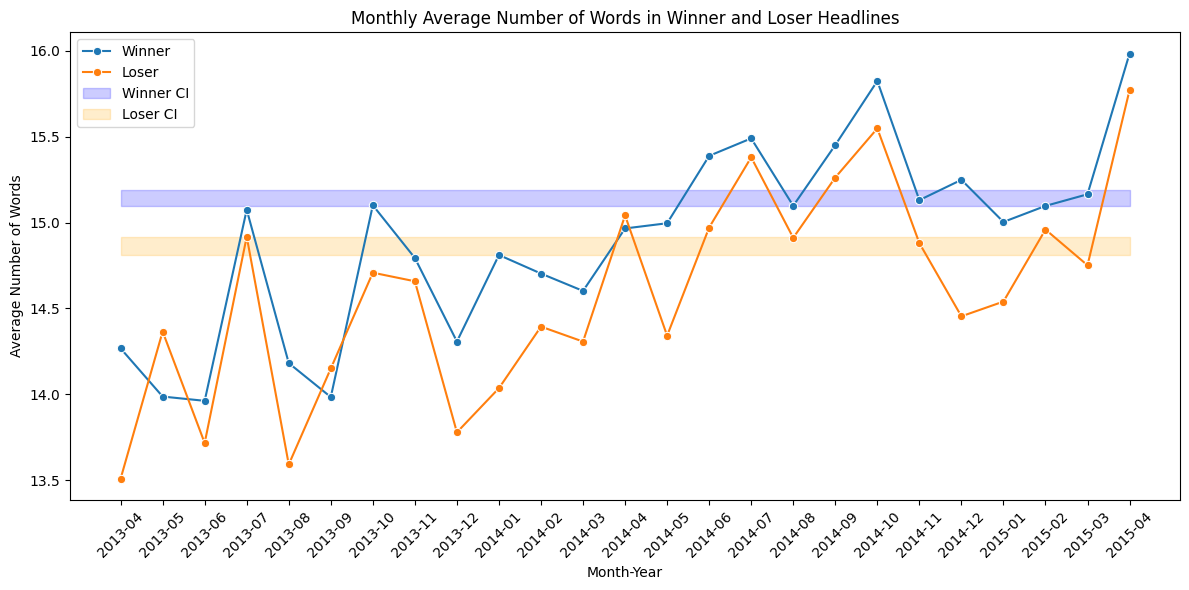

In [102]:
# Filter headlines created after April 2013
filtered_data = new_upworthy[new_upworthy['date_created'] >= '2013-04-01']

# Extract month and year from the 'date_created' column
filtered_data['month_year'] = filtered_data['date_created'].dt.to_period('M')

# Calculate the monthly average number of words for winner and loser headlines
monthly_avg_winner = filtered_data.groupby('month_year')['numwords1'].mean()
monthly_avg_loser = filtered_data.groupby('month_year')['numwords2'].mean()

# Convert Pandas Series to NumPy arrays
numwords1_array = filtered_data['numwords1'].values
numwords2_array = filtered_data['numwords2'].values

# Bootstrap to calculate 95% confidence intervals
num_bootstrap_samples = 1000
winner_bootstrap = np.percentile([np.mean(np.random.choice(numwords1_array, size=len(numwords1_array))) for _ in range(num_bootstrap_samples)], [2.5, 97.5])
loser_bootstrap = np.percentile([np.mean(np.random.choice(numwords2_array, size=len(numwords2_array))) for _ in range(num_bootstrap_samples)], [2.5, 97.5])

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg_winner.index.astype(str), y=monthly_avg_winner.values, label='Winner', marker='o')
sns.lineplot(x=monthly_avg_loser.index.astype(str), y=monthly_avg_loser.values, label='Loser', marker='o')

# Plot 95% confidence intervals
plt.fill_between(monthly_avg_winner.index.astype(str), winner_bootstrap[0], winner_bootstrap[1], alpha=0.2, label='Winner CI', color='blue')
plt.fill_between(monthly_avg_loser.index.astype(str), loser_bootstrap[0], loser_bootstrap[1], alpha=0.2, label='Loser CI', color='orange')

# Plotting settings
plt.title('Monthly Average Number of Words in Winner and Loser Headlines')
plt.xlabel('Month-Year')
plt.ylabel('Average Number of Words')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

4.2 Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in **T4.1**, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines).
Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

C:\Users\Hadi\AppData\Local\Temp\ipykernel_28996\372095659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month_year'] = filtered_data['date_created'].dt.to_period('M')


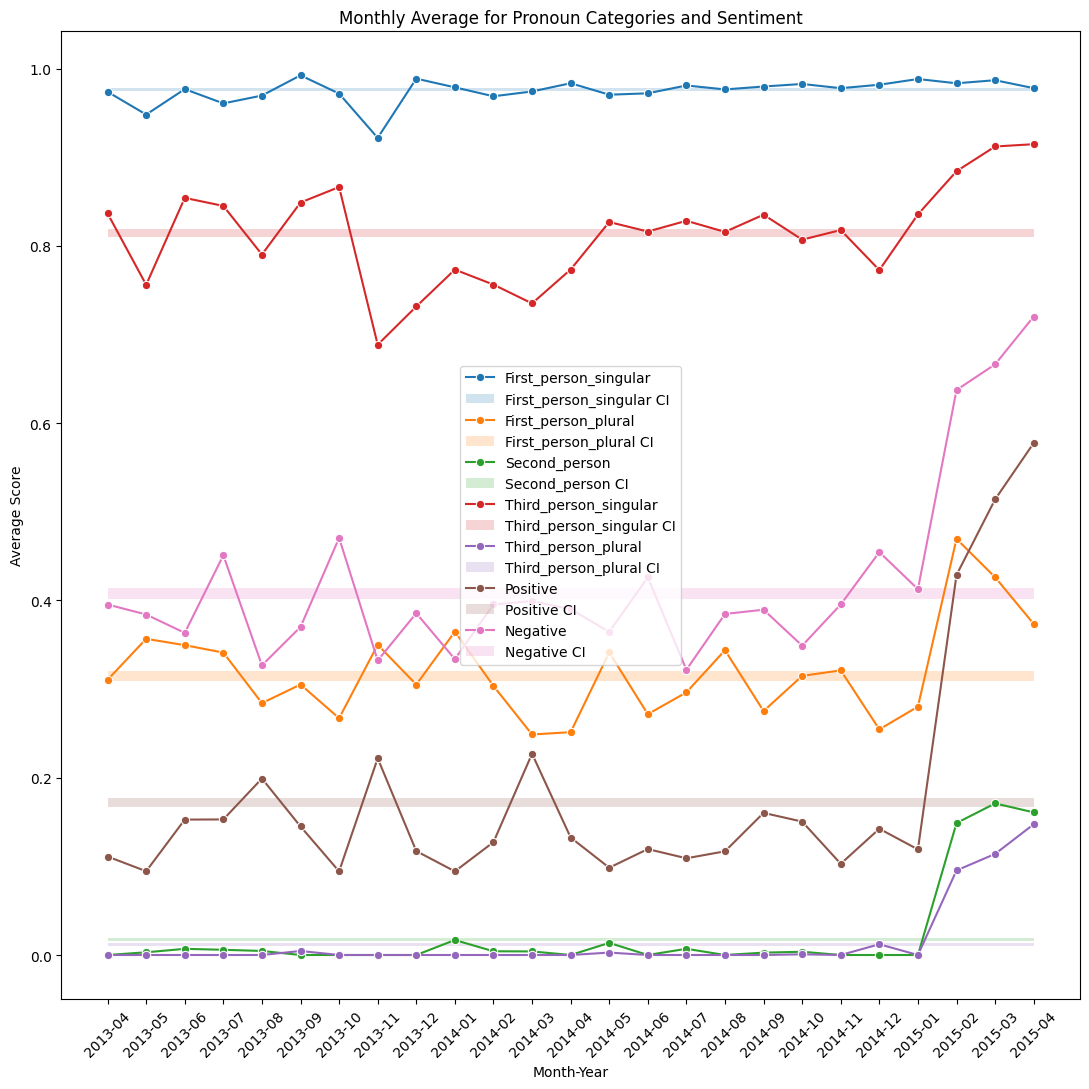

In [103]:
# Filter headlines created after April 2013
filtered_data = new_upworthy[new_upworthy['date_created'] >= '2013-04-01']

# Extract month and year from the 'date_created' column
filtered_data['month_year'] = filtered_data['date_created'].dt.to_period('M')

# Define pronoun and sentiment categories
categories = ['first_person_singular', 'first_person_plural', 'second_person', 'third_person_singular', 'third_person_plural', 'positive', 'negative']

# Plotting
plt.figure(figsize=(11, 11))

for category in categories:
    # Calculate the monthly average for the current category
    monthly_avg_category = filtered_data.groupby('month_year')[f'{category}1'].mean() + filtered_data.groupby('month_year')[f'{category}2'].mean()
    monthly_avg_category /= 2

    # Bootstrap to calculate 95% confidence intervals
    category_array = (filtered_data[f'{category}1'].values + filtered_data[f'{category}2'].values) / 2
    category_bootstrap = np.percentile([np.mean(np.random.choice(category_array, size=len(category_array))) for _ in range(num_bootstrap_samples)], [2.5, 97.5])

    # Plotting
    sns.lineplot(x=monthly_avg_category.index.astype(str), y=monthly_avg_category.values, label=category.capitalize(), marker='o')
    plt.fill_between(monthly_avg_category.index.astype(str), category_bootstrap[0], category_bootstrap[1], alpha=0.2, label=f'{category.capitalize()} CI')

# Plotting settings
plt.title('Monthly Average for Pronoun Categories and Sentiment')
plt.xlabel('Month-Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

4.3 **Discuss:** Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

It can be seen that, from the second month of 2015, most of the parameters in our analysis are begin changed significantly. This change is mostly had an increasing effect in number of clicks receiving each of them.

4.4 Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period.

In [104]:
# Convert 'date_created' to datetime format
new_upworthy['date_created'] = pd.to_datetime(new_upworthy['date_created'])

# Define the start and end dates for each period
t1_start_date = '2013-04-01'
t1_end_date = '2014-03-31'
t2_start_date = '2014-04-01'
t2_end_date = new_upworthy['date_created'].max()  # Use the latest A/B test date as the end date for t2

# Create dataframes for each period
t1_data = new_upworthy[(new_upworthy['date_created'] >= t1_start_date) & (new_upworthy['date_created'] <= t1_end_date)]
t2_data = new_upworthy[(new_upworthy['date_created'] >= t2_start_date) & (new_upworthy['date_created'] <= t2_end_date)]

# Display the first few rows of each dataframe
print("DataFrame for Period t1:")
print(t1_data.head(5))

print("\nDataFrame for Period t2:")
print(t2_data.head(5))

DataFrame for Period t1:
        clickability_test_id             eyecatcher_id  \
42  5143607c220cb80002000939  5332bb721fae79f09f004fca   
43  5143607c220cb80002000939  5332bb721fae79f09f004fca   
44  5143607c220cb80002000939  5332bb721fae79f09f004fca   
45  5143607c220cb80002000939  5332bb721fae79f09f004fca   
46  5143607c220cb80002000939  5332bb721fae79f09f004fca   

                                                 lede excerpt  \
42  <p>Minimum wage doesn't mean "the minimum amou...           
43  <p>Minimum wage doesn't mean "the minimum amou...           
44  <p>Minimum wage doesn't mean "the minimum amou...           
45  <p>Minimum wage doesn't mean "the minimum amou...           
46  <p>Minimum wage doesn't mean "the minimum amou...           

                                            headline1  \
42  How Much Would You Be Making If Wages Had Kept...   
43  How Much Would Minimum Wagers Be Making RIGHT ...   
44  I Was Shocked When I Saw This Sentence And Sad...   
45  How

4.5 Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

In [105]:
from scipy.stats import ttest_ind

# Bonferroni Correction:
# The Bonferroni correction is a method to control the familywise error rate when performing multiple hypothesis tests.
# It adjusts the significance level by dividing it by the number of tests to maintain an overall error rate.
# In this case, we divide the nominal significance level (0.05) by the number of categories to get the adjusted significance level.

# Define the significance level after Bonferroni correction
adjusted_alpha = 0.05 / len(categories)  # Adjusted significance level using Bonferroni correction

# Create empty lists to store results
significant_results = []
p_values = []

# Loop through each category
for category in categories:
    # Extract data for t1 and t2
    t1_category_data = t1_data[f'{category}1'].values + t1_data[f'{category}2'].values
    t2_category_data = t2_data[f'{category}1'].values + t2_data[f'{category}2'].values

    # Perform two-sample t-test
    _, p_value = ttest_ind(t1_category_data, t2_category_data, equal_var=False)  # Assuming unequal variances

    # Check if the p-value is below the adjusted significance level
    significant = p_value < adjusted_alpha

    # Store results
    significant_results.append(significant)
    p_values.append(p_value)

# Display results
results_df = pd.DataFrame({
    'Category': categories,
    'Significant Difference': significant_results,
    'P-Value': p_values
})

results_df

,Category,Significant Difference,P-Value
0,first_person_singular,True,1.415660e-06
1,first_person_plural,False,2.037015e-01
2,second_person,True,4.378661e-45
3,third_person_singular,True,4.299940e-18
4,third_person_plural,True,3.725696e-59
5,positive,True,3.372547e-06
6,negative,True,5.562198e-06


4.6 **Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period? 

It can be seen that most of the effects had been changed significantly. This can come from two factors or reasons, first one is the change in the preferrences of the users, which caused the winner headlines to be different in most of the parameters. Another factor which can be caused this effect, is that this change of headlines, is a result of changing all of the experiments. In other words, because all of the experiments parameters have been changed significantly, as a result of this, winner headlines have been changed significantly.

4.7 The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (you are amazing!), but dislike headlines with negative words and first person pronouns (you are awful!). To help answer this question, create:
- A dataframe containing all A/B tests where both winner and loser headlines include a positive word.
- A dataframe containing all A/B tests where both winner and loser headlines include a negative word.

4.8 Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**? 

4.9 **Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines. 
You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text. 


## 4 Summing up
Now you have implemented the pipeliene to continiously compare various headlines against each other and even through time. So it's time to come back and think, was it worth the endeavor? In other words, can you think of any other ways to achieve the same goal? It is also time (or maybe even late!) to think of the ethics of what you have done!

5.1 **Discuss:** Try to think of other solutions that would possibly achieve the same goal. Maybe with less precision but also less complexity, cost of implementation, etc. Briefly explain your suggestions and how they would compromise accuracy for other objectives.  
What ethical pitfalls can you imagine for what you did in this homework? Do you think that such statistical analysis is immune to unethical engagement optimization? It's quite obvious that a horrifying, decieving, or offensive headline would trigger more interaction than a descent one.


One way to do that, is ot synthetize data in an artificial manner, from the existing data in the non-experimental dataset. This can be done using different techniques and the biggest pitfall of this method is it's accuaracy and probably its different with real world results.

The methodology used here for finding best parameters of presenting a news, has clearly the problem that this experiments may not being evaluated by humans from the ethical aspects completely. This can cause secondary effects on the users which can be very bad in some cases which makes it unethical generally.

5.2 **Discuss:** Briefly explain how you think we can handle this trade-off. In other words, what can we do to stop our pipeline from getting biased towards unethical headlines?

One way to prevent this danger, is to bias the tendency of pipeline to the more negative or other unethical headlines in a negative way. For example, this can be done by adding a penalty for this kind of headlines and in the evaluating them with a new evaluation function which is more complex, and considers problematic headlines issues.